In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
from PIL import Image
from skimage import io

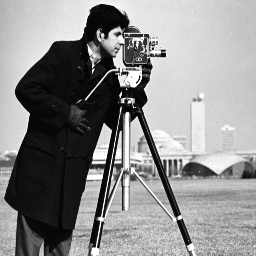

In [4]:
img = Image.open('./camman.tif')
img

In [5]:
img = img.convert('L')

img = np.array(img)

img.shape


(256, 256)

**Explication :**

-La méthode `convert` est utilisée pour transformer une image en niveaux de  
 gris (mode 'L' signifie "Luminance"). Cela simplifie l'image en supprimant les informations de couleur.

-Ici, l'image est convertie en un `tableau NumPy`.
 Cela permet de manipuler l'image comme une matrice de valeurs numériques,
 où chaque valeur représente une intensité de pixel en niveaux de gris.

-Ensuite, on affiche les dimensions de l'image sous forme de tuple.
 Par exemple, (256, 256) indique que l'image a une résolution de 256x256 pixels.

In [6]:

noise = np.random.normal(0,25, size=img.shape)



Cette ligne génère un bruit aléatoire selon une distribution normale (`gaussienne`)
avec une moyenne de 0 et un écart-type de 25. La taille du bruit (`size`)
correspond à la taille de l'image (`img.shape`), de sorte que le bruit puisse être ajouté pixel par pixel.


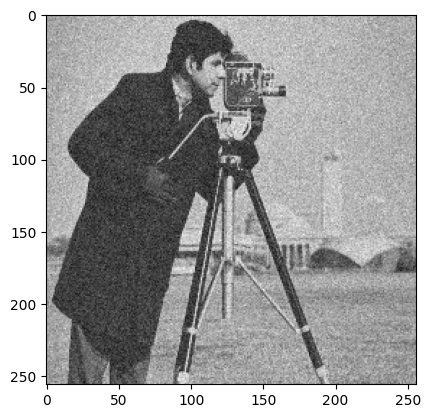

In [7]:

plt.imshow(img+noise, cmap='gray')

 après on affiche l'image avec le bruit ajouté (`img + noise)`.
 Le paramètre `cmap='gray'` est utilisé pour afficher l'image en niveaux de gris.

# I. Filtrage spatial linéaire

## une fonction gauss_Bruit(img, m, sd)

In [8]:
def gauss_bruit(img, m, sd):
    noise = np.random.normal(loc=m, scale=sd, size=img.shape).astype(np.uint8)
    img_n = img + noise
    return np.clip(img_n, 0, 255)

**Explications :**

**Objectif :** Cette fonction ajoute du bruit gaussien à une image et retourne une version bruitée.

**Détails :**
`loc=m `: La moyenne de la distribution normale utilisée pour générer le bruit.

`scale=sd `: L'écart-type de la distribution, qui contrôle l'intensité du bruit.

`size=img.shape` : Le bruit généré aura la même taille que l'image.

`.astype(np.uint8)` : Les valeurs du bruit sont converties en entier non signé 8 bits (valeurs entre 0 et 255), pour être compatibles avec les pixels de l'image.

`img_n = img + noise `: On ajoute le bruit à l'image originale, pixel par pixel.

`np.clip(img_n, 0, 255)` : Cette fonction s'assure que les valeurs des pixels restent dans l'intervalle [0, 255], évitant les débordements.

In [9]:
def display_images(img1,img2, t1='Original', t2='After', figsize=(12,10)):
    fig, axes = plt.subplots(1,2, figsize=figsize)

    axes[0].imshow(img1, cmap='gray')
    axes[0].set_title(t1)

    axes[1].imshow(img2, cmap='gray')
    axes[1].set_title(t2)

    for ax in axes:
        ax.axis('off')

    plt.show()

**Explications :**

**Objectif :** Cette fonction permet d'afficher deux images côte à côte pour les comparer.

**Détails :**

`plt.subplots(1, 2, figsize=figsize) `: Crée une figure avec 2 sous-graphiques (1 ligne, 2 colonnes). La taille de la figure est définie par figsize.

`axes[0].imshow(img1, cmap='gray') `: Affiche la première image (img1) en niveaux de gris.

`axes[1].imshow(img2, cmap='gray')` : Affiche la deuxième image (img2) en niveaux de gris.

`set_title(t1/t2) `: Ajoute un titre à chaque image pour les distinguer (par défaut, "Original" et "After").

`ax.axis('off')` : Désactive les axes pour rendre l'affichage plus propre.

`plt.show()` : Affiche les images à l'écran.

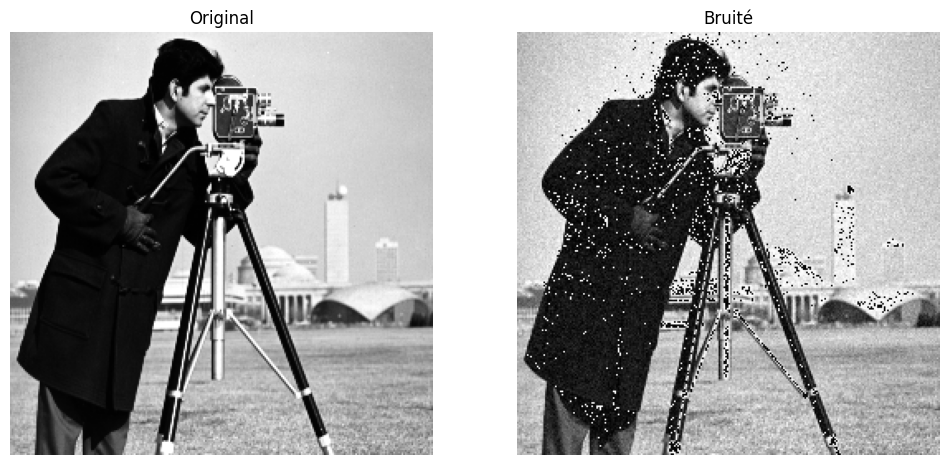

In [10]:
img_b = gauss_bruit(img, 5, 10) # 5 10
display_images(img, img_b,t2='Bruité', figsize=(12,8))

**Explications :**

**Objectif :** Ajouter du bruit gaussien à une image (img) et afficher l'image originale et bruitée côte à côte.

**Détails :**

`gauss_bruit(img, 5, 10)` :
Ajoute un bruit gaussien à l'image avec une moyenne de 5 et un écart-type de 10.

`display_images(img, img_b, t2='Bruitée', figsize=(12,8))` :
Affiche l'image originale et la version bruitée côte à côte.



##  filtre_Moy(image) permettant de réaliser lissage par moyennag dans un voisinage 3x3

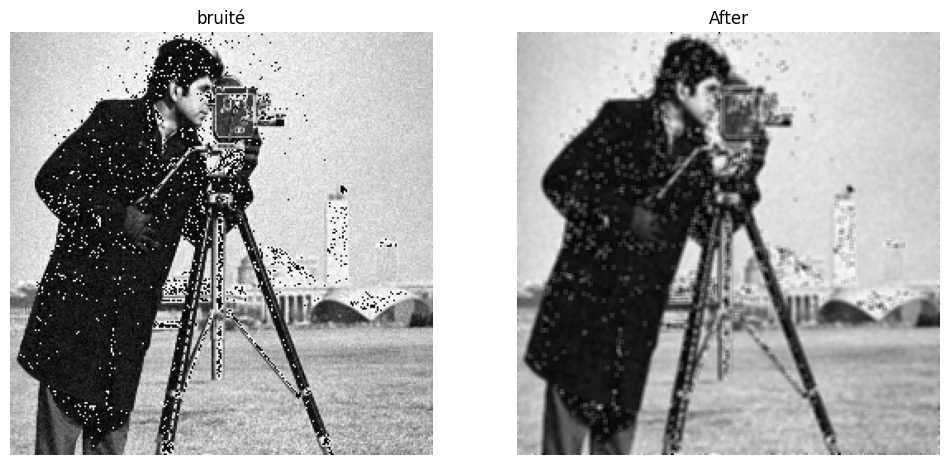

In [11]:
# filtre_Moy(image) permettant de réaliser lissage par moyennag dans un voisinage 3x3
def filtre_Moy(image):
    m,n = image.shape
    n_img = np.copy(image)
    for i in range(1, m-1):
        for j in range(1, n-1):
            n_img[i,j] = np.sum(image[i-1:i+2,j-1:j+2]) / 9

    return n_img
img_n = filtre_Moy(img_b)
display_images(img_b, img_n, t1='bruité')

**Explications :**

**Objectif :** Appliquer un filtre de lissage par moyennage sur une image bruitée (img_b) pour réduire le bruit en remplaçant chaque pixel par la moyenne des pixels dans son voisinage 3x3.

**Détails :**

`filtre_Moy(image)` :

Réalise un lissage par moyennage dans un voisinage 3x3.

Chaque pixel est remplacé par la moyenne des pixels de son voisinage.

Le filtrage ne s'applique pas sur les bords de l'image pour éviter les débordements.

**Étapes principales :**

`m, n = image.shape` : Récupère les dimensions de l'image (nombre de lignes et colonnes).

`n_img = np.copy(image)` : Crée une copie de l'image pour ne pas modifier l'originale.

`Boucles for i in range(1, m-1) et for j in range(1, n-1)` :
Parcourt les pixels internes de l'image, en excluant les bords.

`np.sum(image[i-1:i+2, j-1:j+2]) / 9 `:
Calcule la somme des valeurs des pixels dans un voisinage 3x3 centré sur le pixel (i, j), puis divise par 9 pour obtenir la moyenne.

`return n_img` : Retourne l'image lissée.

**Application :**

`img_n = filtre_Moy(img_b)` : Applique le filtre de lissage à l'image bruitée (img_b) pour produire une nouvelle image (img_n) avec un bruit réduit.

## pour un voisinage de n*m

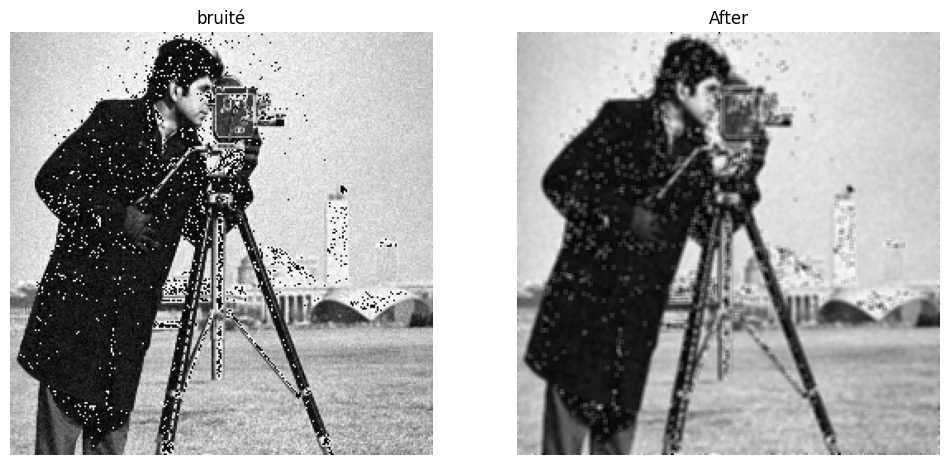

In [12]:
# pour un voisinage de n*m
def filtre_Moy(image,m=3, n=3):
    n_img = np.copy(image)

    x = m//2
    y = n//2

    for i in range(x, image.shape[0]-x):
        for j in range(y, image.shape[1]-y):
            n_img[i,j] = np.sum(image[i-x:i+x+1,j-y:j+y+1]) / (m*n)

    return n_img
img_n = filtre_Moy(img_b, 3,3)
display_images(img_b, img_n, t1='bruité')

**Explications :**

**Objectif :**
 Appliquer un filtre de lissage par moyennage sur une image en utilisant un voisinage de taille personnalisée m×n.
 Ce filtre permet de réduire le bruit dans l'image en remplaçant chaque pixel par la moyenne des pixels dans un voisinage rectangulaire défini par m et n.

**Détails :**

1.Définition de la fonction `filtre_Moy(image, m=3, n=3)` :

-Réalise un lissage par moyennage sur un voisinage de taille m×n.

-Par défaut, m=3 et n=3 (voisinage de 3x3).

-Chaque pixel est remplacé par la moyenne des pixels dans son voisinage.

**Étapes principales :**

`n_img = np.copy(image) `: Crée une copie de l'image pour stocker les nouvelles valeurs sans modifier l'image originale.

`x = m // 2, y = n // 2` : Définit la moitié des dimensions du voisinage. Cela permet de centrer le voisinage sur chaque pixel.

`Boucles for i in range(x, image.shape[0]-x) et for j in range(y, image.shape[1]-y)` :
Parcourt chaque pixel interne de l'image, en évitant les bords qui ne disposent pas d'un voisinage complet de m×n.

`np.sum(image[i-x:i+x+1, j-y:j+y+1]) / (m * n) `:
Calcule la somme des pixels dans le voisinage m×n centré sur le pixel (i, j).
Divise cette somme par m×n pour obtenir la moyenne.

`return n_img `: Retourne l'image lissée.

**Application :**

`img_n = filtre_Moy(img_b, 3, 3) `:
Applique le filtre de lissage à l'image bruitée img_b en utilisant un voisinage de 3x3 pixels.
Le résultat est une image lissée img_n, où le bruit a été réduit.

**Affichage :**

`display_images(img_b, img_n, t1='bruité')\` :
Affiche l'image bruitée et l'image lissée côte à côte.
Le titre de l'image bruitée est défini comme "bruité".


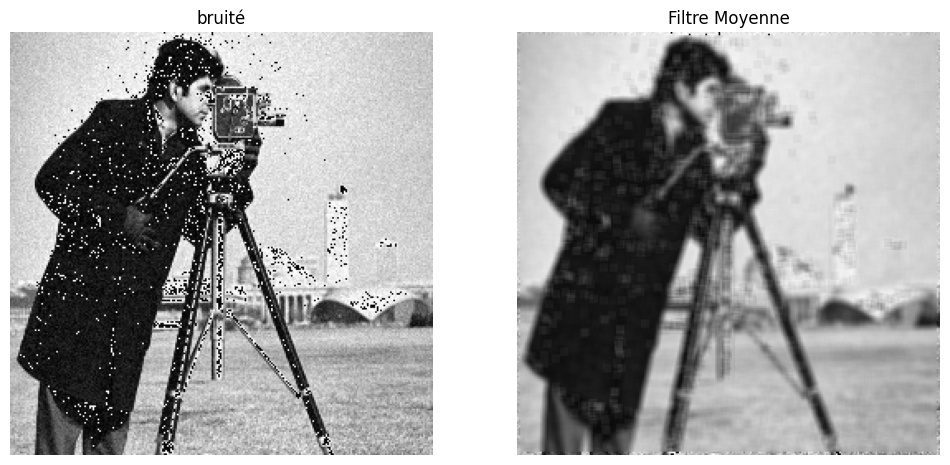

In [13]:
img_n = filtre_Moy(img_b, 5, 5)
display_images(img_b, img_n, t1='bruité',t2='Filtre Moyenne')

Appliquer un filtre de lissage par moyennage sur un voisinage de 5x5 pixels pour réduire le bruit dans l'image bruitée `img_b`

## filtre_PBas

In [14]:
#filtre_PBas
def filter_PBas(image, H):
    n_image = np.zeros_like(image, dtype=np.float32)

    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            n_image[i,j] = np.sum(image[i-1:i+2,j-1:j+2] * H)

    return np.clip(n_image, 0,255).astype(np.uint8)

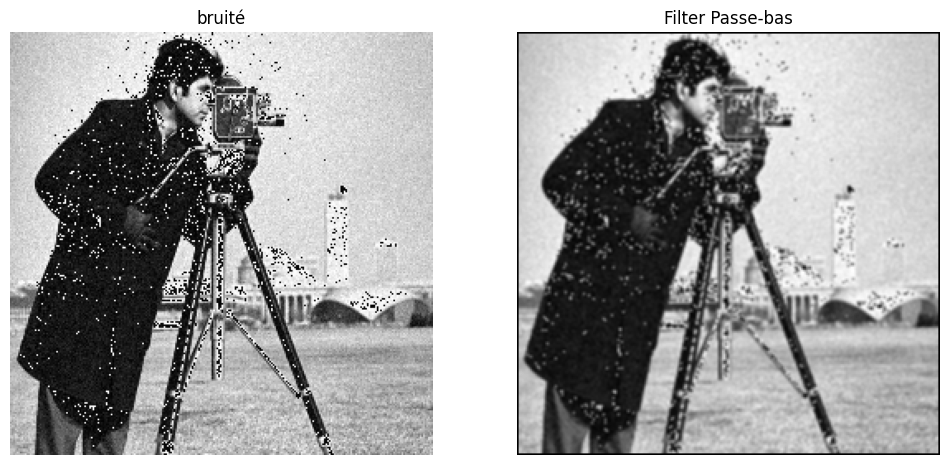

In [15]:
H = (1/16) * np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]
])

img_n = filter_PBas(img_b, H)
display_images(img_b, img_n, t1='bruité', t2='Filter Passe-bas')

**Explication :**

**Objectif :** Appliquer un filtre passe-bas sur une image bruitée (`img_b`) pour réduire le bruit en utilisant une convolution avec un noyau (ou matrice de filtre) ***H***.

**Détails :**

1.`filter_PBas(image, H)` :

-Applique un filtre passe-bas en effectuant une convolution entre l'image
 d'entrée et un noyau ***H***.
-Le filtre passe-bas lisse l'image en atténuant les hautes fréquences (bruit)  
 et en conservant les basses fréquences (informations importantes).

**Étapes principales :**

`n_image = np.zeros_like(image, dtype=np.float32)` : Crée une nouvelle image vide pour stocker les résultats de la convolution.

`Boucles for i in range(1, image.shape[0] - 1) et for j in range(1, image.shape[1] - 1) `:
Parcourt chaque pixel interne de l'image, en évitant les bords.

`np.sum(image[i-1:i+2, j-1:j+2] * H)` :
Multiplie le voisinage 3×3 autour du pixel (i, j) par le noyau
***H***, puis calcule la somme des valeurs pour appliquer la convolution.

`np.clip(n_image, 0, 255).astype(np.uint8)` :
Limite les valeurs des pixels entre 0 et 255 et convertit le résultat en type entier non signé pour obtenir une image valide.

2.***H*** (Noyau du filtre passe-bas) :

H est une matrice de 3×3 représentant un filtre gaussien normalisé (valeurs divisées par 16).
Cette matrice donne plus de poids au pixel central et à ses voisins immédiats pour créer un effet de lissage :

H = \frac{1}{16} \begin{bmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{bmatrix}


**Application :**

`img_n = filter_PBas(img_b, H)` :
Applique le filtre passe-bas défini par ***H*** sur l'image bruitée `img_b` pour produire une nouvelle image filtrée `img_n`.

**Affichage :**

`display_images(img_b, img_n, t1='bruité', t2='Filter Passe-bas')\` :
Affiche l'image bruitée (img_b) à gauche avec le titre "bruité".
Affiche l'image filtrée (img_n) à droite avec le titre "Filter Passe-bas".

## filtre_PHaut

In [16]:
#filtre passe-haut
def filter_PHaut(image, H):
    #n_image = np.copy(image)

    n_image = np.zeros_like(img, dtype=np.float32)

    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):

            p = image[i-1:i+2,j-1:j+2] * H
            n_image[i,j] = np.sum(p)

    return np.clip(n_image, 0, 255).astype(np.uint8)

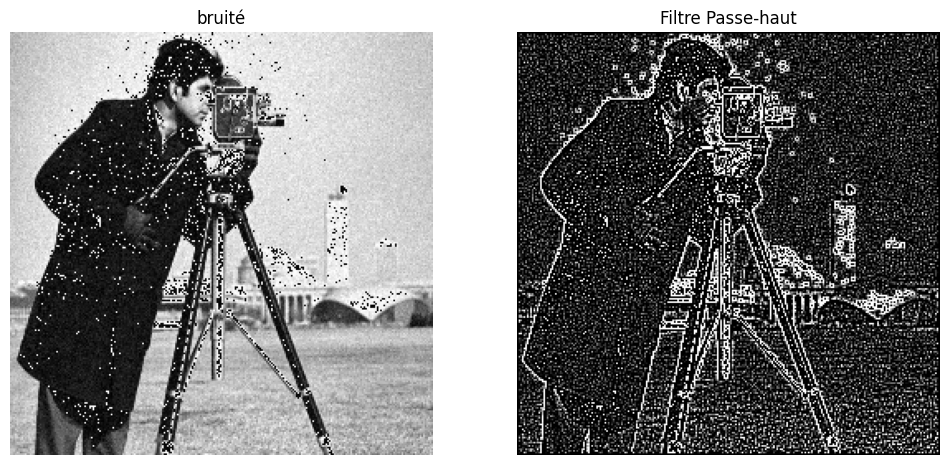

In [17]:
H = np.array([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
])

img_n = filter_PHaut(img_b, H)

#img_n = cv2.filter2D(img, -1, H)
display_images(img_b, img_n, t1='bruité', t2='Filtre Passe-haut')

**Explication :**  

**Objectif :**

Appliquer un filtre passe-haut sur une image bruitée (`img_b`) pour accentuer les contours et les détails fins. Ce filtre met en évidence les hautes fréquences (variations rapides comme les bords et les détails) tout en atténuant les basses fréquences (zones uniformes).


1. `Fonction filter_PHaut(image, H)` :

 Cette fonction applique une convolution entre l'image d'entrée et un noyau
 ***H***, correspondant à un filtre passe-haut.

  - `n_image = np.zeros_like(image, dtype=np.float32) `:

    Initialise une image vide avec les mêmes dimensions que l'image d'entrée, mais avec des valeurs en virgule flottante pour plus de précision dans les calculs.

  - Double boucle `for` :

    -Parcourt chaque pixel interne de l'image (les pixels des bords ne sont pas
    traités pour éviter les débordements).

    -`p = image[i-1:i+2, j-1:j+2] * H` :
    Extrait un voisinage 3×3 autour du pixel courant (i, j).
    Multiplie chaque pixel de ce voisinage par l'élément correspondant du noyau H (opération de convolution).

    -`n_image[i, j] = np.sum(p)` :
    Calcule la somme des produits pour obtenir la valeur du pixel filtré.

  - `np.clip(n_image, 0, 255).astype(np.uint8) `:

    -Limite les valeurs des pixels entre 0 et 255 pour éviter les dépassements.

    -Convertit les valeurs en entiers non signés (type approprié pour une image).

2. `Noyau H (Filtre Passe-haut)` :

 Le noyau ***H***  utilisé ici est un filtre de détection des contours (Laplacien), défini par la matrice suivante :

 H = \begin{bmatrix}
-1 & -1 & -1 \\
-1 & 8  & -1 \\
-1 & -1 & -1
\end{bmatrix}

  `-Description :`

    -La valeur centrale 8 donne un poids important au pixel courant.

    -Les valeurs négatives autour (-1) soustraient les contributions des pixels
    voisins.

    -Cela met en évidence les différences locales (les contours ou variations
    brusques), tout en supprimant les zones uniformes.
   
3. `Application `:

 -`img_n = filter_PHaut(img_b, H)` :

      -Applique le filtre passe-haut H à l'image bruitée img_b pour produire  
       une image filtrée img_n.

      -L'image résultante met en évidence les contours présents dans l'image   d'origine.
  
4. `Affichage des résultats` :

  - `display_images(img_b, img_n, t1='bruité', t2='Filtre Passe-haut')` :

      -Affiche l'image bruitée (img_b) à gauche avec le titre "bruité".

      -Affiche l'image filtrée (img_n) à droite avec le titre "Filtre      
       Passe-haut".

**`Effet du Filtre Passe-haut` :**

  -Le filtre passe-haut est utilisé pour accentuer les détails dans une image, en mettant en évidence les contours et les transitions rapides d'intensité (comme les bords).

  -L'image résultante peut être utilisée pour des tâches telles que la détection de contours ou pour améliorer les zones détaillées dans une image.



#II. 	Filtrage spatial non linéaire

## lissage_MinMax

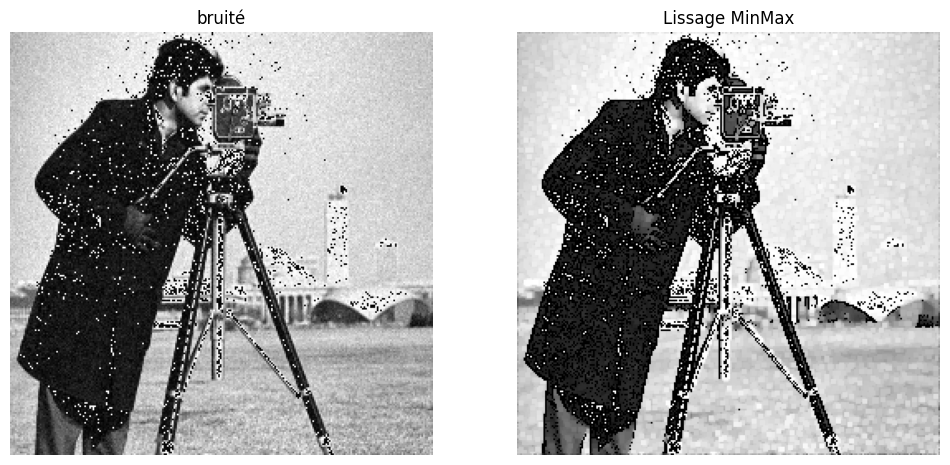

In [18]:
#lissage_MinMax
def lissage_MinMax(image):
    n_img = np.copy(image)

    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            m = np.min(image[i-1:i+2])
            M = np.max(image[i-1:i+2, j-1:j+2])
            x = image[i,j]

            n_img[i,j] = m if x < (M-m) / 2 else M
    return n_img


img_n = lissage_MinMax(img_b)
display_images(img_b, img_n, t1='bruité', t2='Lissage MinMax')

**Explication :**

**Objectif :**

Appliquer un filtrage basé sur les valeurs minimales et maximales dans un voisinage 3×3 pour lisser une image tout en préservant certains détails. Ce filtre ajuste chaque pixel en fonction de sa proximité avec les valeurs extrêmes dans son voisinage, ce qui permet de réduire le bruit tout en conservant une partie des contours.

`Détails du code :`

1. `Fonction lissage_MinMax(image)` :
  Cette fonction implémente un filtre non linéaire basé sur les valeurs minimum et maximum du voisinage d'un pixel.

  - `n_img = np.copy(image)` :

    Copie l'image d'entrée pour préserver les données originales. Les modifications sont faites sur la copie `n_img`.
    
  - `Double boucle for` :

    Parcourt chaque pixel interne de l'image (les bords ne sont pas traités pour éviter les débordements).

  - `Extraction des valeurs du voisinage `:

     - `m = np.min(image[i-1:i+2, j-1:j+2])` :

        - Calcule la valeur minimale m dans le voisinage 3×3 centré sur le  
         pixel (i,j).

    - `M = np.max(image[i-1:i+2, j-1:j+2])` :
        - Calcule la valeur maximale M dans le même voisinage.

 - `Récupération de la valeur actuelle du pixel` :

    - `x = image[i, j]` :
       - Stocke l'intensité du pixel courant.

 - `Décision basée sur la position relative de x `:

    - `n_img[i, j] = m if x < (M - m) / 2 else M` :

      - Si x est inférieur à la moyenne de M et m (c'est-à-dire si
        x est plus proche de m), le pixel est remplacé par m.

      - Sinon, il est remplacé par M.

      - Cette règle favorise l'attribution de x à l'extrémité la plus proche,  
        ce qui lisse l'image tout en préservant les transitions fortes (comme les bords).

 - `return n_img `:

     - Retourne l'image lissée.
  
2. `Application` :

  - `img_n = lissage_MinMax(img_b)` :

    - Applique le filtre Min-Max sur l'image bruitée img_b pour obtenir l'image
      lissée img_n.
         
    - Ce processus atténue le bruit tout en conservant certains détails
      structuraux (comme les contours).

3. `Affichage des résultats` :

 - `display_images(img_b, img_n, t1='bruité', t2='Lissage MinMax')` :

    - Affiche l'image bruitée img_b à gauche avec le titre "bruité".

    - Affiche l'image lissée img_n à droite avec le titre "Lissage MinMax".

**Effet du Lissage Min-Max :**

  - Le filtre Min-Max est efficace pour réduire les bruits impulsionnels, tels
    que le bruit poivre-et-sel, en adaptant chaque pixel à son voisinage local.
     
  - En remplaçant un pixel par la valeur minimale ou maximale, il conserve les
    transitions nettes tout en supprimant les variations aberrantes.

  - Ce type de filtrage est particulièrement utile lorsque l'on cherche à
    préserver les contours tout en réduisant les bruits localisés.

## filtrage médian

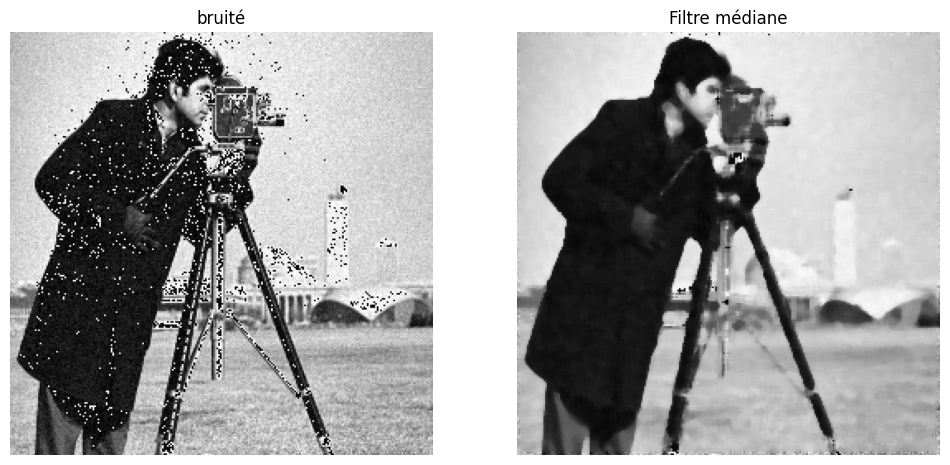

In [19]:
#filtrage médian
def filtrage_Median(image):
    img_n = np.copy(image)

    for i in range(2, image.shape[0]-2):
        for j in range(2, image.shape[1]-2):
            img_n[i,j] = np.median(image[i-2:i+3, j-2:j+3])
    return img_n

img_n = filtrage_Median(img_b)
display_images(img_b, img_n, t1='bruité', t2='Filtre médiane')

**Explication :**

**Objectif :**

Appliquer un **filtre médian** sur une image bruitée pour réduire le bruit tout en préservant les contours. Ce filtre remplace chaque pixel par la valeur médiane des pixels de son voisinage.

**Détails du code :**
1. `Fonction filtrage_Median(image)` :

    Cette fonction implémente un filtre médian sur une image en utilisant un voisinage 5×5.

   - `img_n = np.copy(image)` :

    - Crée une copie de l'image originale pour y appliquer les modifications
      tout en conservant les données initiales intactes.

  - `Double boucle for` :

    - Parcourt chaque pixel interne de l'image en sautant les bords pour éviter
      les débordements (les pixels des bords ne sont pas traités ici).

    - `range(2, image.shape[0]-2) `:

         - L'indice commence à 2 et se termine à taille−2, ce qui permet de
           considérer un voisinage 5×5.

  - `Extraction et calcul de la médiane `:

    - `image[i-2:i+3, j-2:j+3]` :

        - Définit un voisinage 5×5 centré sur le pixel (i,j).

    - `np.median()` :

        - Calcule la valeur médiane des pixels dans ce voisinage.

        - La médiane est moins sensible aux valeurs extrêmes (comme le bruit
          poivre-et-sel), ce qui en fait un bon choix pour le lissage tout en préservant les bords.

  - `img_n[i, j] = np.median(...)` :

     - Remplace la valeur du pixel (i,j) par la médiane calculée dans son
        voisinage.

  - `return img_n `:

      - Retourne l'image filtrée avec les nouvelles valeurs des pixels.

2. **Application :**

  - `img_n = filtrage_Median(img_b)` :

     - Applique le filtre médian sur l'image bruitée img_b pour produire  
       l'image filtrée img_n.

     - Le bruit impulsionnel (poivre-et-sel) est efficacement réduit, et les   contours de l'image restent intacts.  

**Effet du Filtrage Médian :**

  - Le filtre médian est particulièrement efficace pour réduire le bruit
    impulsionnel sans flouter les contours de l'image, contrairement à un filtre de moyenne.

  - Les détails importants, comme les bords et les transitions nettes, sont
    préservés, ce qui en fait un filtre idéal pour des images affectées par des bruits localisés.









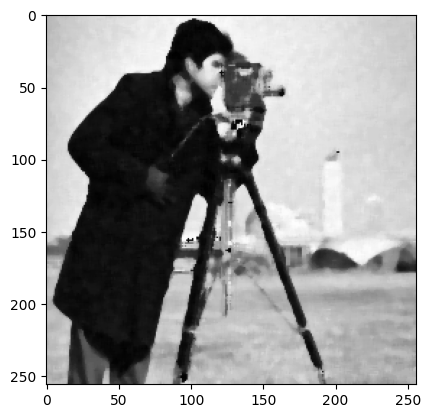

In [20]:
plt.imshow(cv2.medianBlur(img_b, 5), cmap='gray')

## filtrage médian hybride





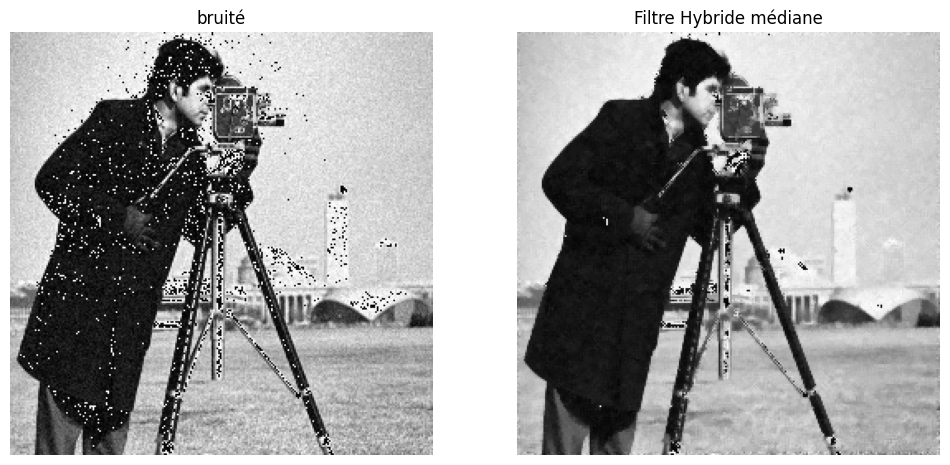

In [21]:
# un filtrage médian hybride

def filtre_hybridMedian(img):
    indicesD = [0,4,6,8,12,16,18,20,24]   # x
    indicesP = [2,7,10,11,12,13,14,17,22] # +

    img_n = np.copy(img)
    for i in range(2, img.shape[0]-2):
        for j in range(2, img.shape[1] - 2):
            b = img[i-2:i+3, j-2:j+3] # bloc

            wB = b.flatten()
            wD = np.take(wB, indicesD)
            wP = np.take(wB, indicesP)
            m1 = np.median(wD)
            m2 = np.median(wP)

            m = np.median([m1, m2, img[i,j]])

            #print(b, wD, wP, m1, m2, m, sep='\n')
            img_n[i,j] = int(m)


    return img_n


img_n = filtre_hybridMedian(img_b)
display_images(img_b, img_n, t1='bruité', t2='Filtre Hybride médiane')

**Explication :**

**Objectif :**

Appliquer un filtrage médian hybride pour réduire le bruit dans une image en utilisant deux motifs de voisinage distincts (diagonale et croix) et en combinant leurs médianes pour une meilleure préservation des détails

**Détails du code :**

 - `Indices des motifs de voisinage` :

   - indicesD : Contient les indices des pixels suivant un motif en forme de  
     "X" (diagonales) dans un voisinage 5×5.

   - indicesP : Contient les indices des pixels suivant un motif en forme de "
     +" (croix) dans le même voisinage.

 - `img_n = np.copy(img)` :

   - Crée une copie de l'image d'entrée pour y appliquer les modifications tout
     en préservant l'image originale.

 - `Parcours des pixels internes` :
    
   - Les boucles imbriquées (i,j) parcourent les pixels de l'image, tout en
     évitant les bords (2 pixels de chaque côté) pour éviter les débordements.

 - `Extraction du voisinage `:
   
   - `b = img[i-2:i+3, j-2:j+3] `:

     Extrait un bloc 5×5 centré sur le pixel courant (i,j).

 - `Aplatissement et sélection des motifs` :

   - wB = b.flatten() : Aplatie le bloc 5×5 en un tableau 1D.

   - wD = np.take(wB, indicesD) : Sélectionne les pixels correspondant au motif
     en diagonale.

   - wP = np.take(wB, indicesP) : Sélectionne les pixels correspondant au motif
     en croix.

- `Calcul des médianes` :

   - m1 = np.median(wD) : Médiane des pixels du motif diagonal.

   - m2 = np.median(wP) : Médiane des pixels du motif croisé.

   - m = np.median([m1, m2, img[i, j]]) : Combine les deux médianes avec la
     valeur du pixel central pour obtenir une valeur finale.

- `Mise à jour du pixel` :

   - `img_n[i, j] = int(m)` : Remplace la valeur du pixel central par la médiane
     hybride calculée.

- `Retour de l'image filtrée` :

   - `return img_n `: Retourne l'image résultante après le filtrage.

**Application :**

- `img_n = filtre_hybridMedian(img_b)` :

   Applique le filtre médian hybride à l'image bruitée img_b, réduisant le bruit tout en conservant les contours et les détails importants.

- `display_images(img_b, img_n, t1='bruité', t2='Filtre Hybride médiane')` :

   Affiche côte à côte l'image bruitée et l'image filtrée avec les titres "bruité" et "Filtre Hybride médiane".


**`Le filtrage médian hybride`** améliore la qualité de l'image en combinant deux motifs de voisinage. Cette méthode est efficace pour réduire les bruits tout en conservant les transitions nettes et les détails structuraux de l'image.


# III. 	Filtre de Nagao

## filtre de Nagao

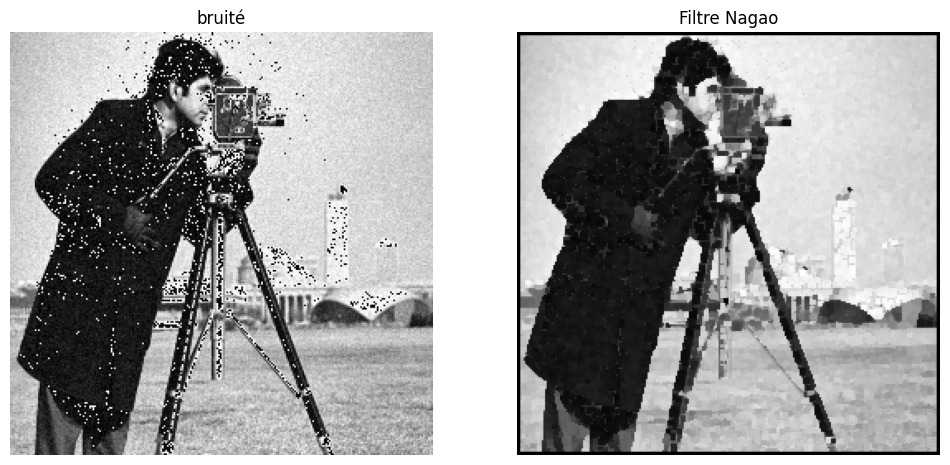

In [22]:

def filtreNagao(img):
    #img_n = np.copy(img)
    img_n = np.zeros_like(img, dtype=np.float32)

    for i in range(2, img.shape[0] - 2):
        for j in range(2, img.shape[1] - 2):
            x = img[i-2:i+3, j-2:j+3] # bloc 5x5


            d1 = np.take(x, indices=[0,1,2,5,6,7,10,11,12])
            d2 = np.take(x, indices=[1,2,3,6,7,8,11,12,13])
            d3 = np.take(x, indices=[2,3,4,7,8,9,12,13,14])

            d4 = np.take(x, indices=[5,6,7,10,11,12,15,16,17])
            d5 = np.take(x, indices=[6,7,8,11,12,13,16,17,18])
            d6 = np.take(x, indices=[7,8,9,12,13,14,17,18,19])

            d7 = np.take(x, indices=[10,11,12,15,16,17,20,21,22])
            d8 = np.take(x, indices=[11,12,13,16,17,18,21,22,23])
            d9 = np.take(x, indices=[12,13,14,17,18,19,22,23,24])

            l = [d1, d2, d3, d4, d5, d6, d7, d8, d9]

            img_n[i,j] = np.mean(l[np.argmin(np.var(l, axis=0))])

    return np.clip(img_n, 0,255).astype(np.uint8)

img_n = filtreNagao(img_b)
display_images(img_b, img_n, t1='bruité', t2='Filtre Nagao')


**Explication :**

**Objectif :**

Appliquer le filtre de Nagao, qui est un filtre non linéaire, pour réduire le bruit tout en préservant les contours et les détails dans une image. Ce filtre divise un voisinage 5×5 en neuf sous-régions, calcule la variance dans chaque région, puis sélectionne celle avec la variance minimale pour calculer la nouvelle valeur du pixel.

**Détails du code :**

- `img_n = np.zeros_like(img, dtype=np.float32)` :

  Initialise une image vide de la même taille que l'image d'entrée, avec des valeurs en flottant pour permettre des calculs précis.

- `Parcours des pixels internes` :

  Les boucles imbriquées (i,j) traversent tous les pixels de l'image, tout en évitant les bords (2 pixels de chaque côté) pour éviter les débordements.

- `x = img[i-2:i+3, j-2:j+3]` :
  
  Extrait un bloc 5×5 centré autour du pixel courant (i,j).

- `Définition des sous-régions` :

  Les neuf sous-régions sont définies en prenant les indices correspondants des éléments dans le bloc 5×5 :

   - d1 à d9 : Chacune de ces variables contient les pixels appartenant à une
      sous-région du voisinage. Par exemple :

        - d1 : Contient les pixels de la sous-région en haut à gauche.

        - d5 : Contient les pixels du centre du voisinage.

- `l = [d1, d2, ..., d9]` :

  - Liste contenant les neuf sous-régions.

- `Calcul de la variance et sélection `:

  - `np.var(l, axis=0)` : Calcule la variance de chaque sous-région.

  - `np.argmin(...) `: Identifie l'indice de la sous-région avec la variance
     minimale (indiquant une zone uniforme).

- `Nouvelle valeur du pixel` :

    - `np.mean(l[np.argmin(...)])` : Calcule la moyenne des pixels dans la    sous-région avec la variance minimale et la définit comme la nouvelle valeur du pixel central (i,j).

- `Retour de l'image filtrée `:

  - `return np.clip(img_n, 0,255).astype(np.uint8) `: Limite les valeurs de
       l'image filtrée à l'intervalle [0,255] et les convertit en entiers pour l'affichage.

**Application :**

- `img_n = filtreNagao(img_b)` :
   Applique le filtre de Nagao à l'image bruitée img_b.

- `display_images(img_b, img_n, t1='bruité', t2='Filtre Nagao') `:
   Affiche côte à côte l'image bruitée et l'image filtrée, avec les titres "bruité" et "Filtre Nagao".


**`Le filtre de Nagao`** est efficace pour réduire le bruit dans les images tout en préservant les contours. En utilisant la variance minimale pour choisir la région la plus homogène, ce filtre assure un bon compromis entre la réduction du bruit et la conservation des détails structuraux.

## l'ajout du bruit impulsionnel

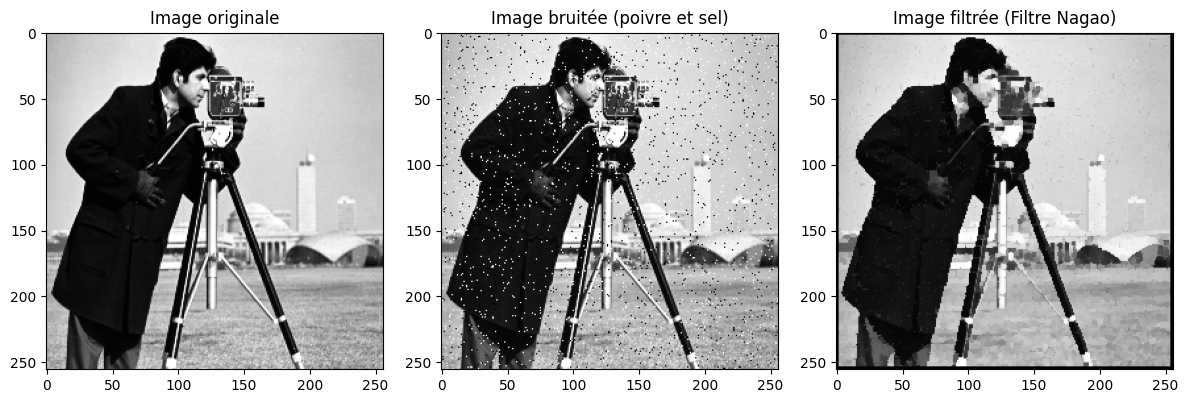

In [23]:
def ajout_bruit_impulsionnel(image, proportion=0.02):
    """
    Ajoute du bruit impulsionnel (poivre et sel) à une image.

    Paramètres :
        image : numpy array
            Image en niveaux de gris.
        proportion : float
            Proportion de pixels bruités.

    Retourne :
        numpy array : Image bruitée.
    """
    image_bruitee = image.copy()
    image_bruitee[np.random.random(image.shape) < proportion] = 0  # Poivre
    image_bruitee[np.random.random(image.shape) < proportion] = 255  # Sel
    return image_bruitee

# Ajouter le bruit impulsionnel
img_bb = ajout_bruit_impulsionnel(img)

# Appliquer le filtre de Nagao
img_nagao = filtreNagao(img_bb)

# Affichage des résultats
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Image originale")
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Image bruitée (poivre et sel)")
plt.imshow(img_bb, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Image filtrée (Filtre Nagao)")
plt.imshow(img_nagao, cmap='gray')

plt.tight_layout()
plt.show()


**Explication :**

**Objectif :**

L'objectif de ce code est de simuler l'ajout de bruit impulsionnel,aussi appelé "bruit poivre et sel",
sur une image en niveaux de gris,puis de démontrer l'efficacité du filtre de Nagao pour réduire ce type de bruit
tout en préservant les détails structuraux de l'image. Le bruit est introduit en modifiant aléatoirement
une proportion de pixels à des valeurs extrêmes (0 ou 255),ce qui est typique des perturbations dans les systèmes
de transmission ou de stockage d'images. Ensuite, le filtre de Nagao est appliqué pour lisser les zones
bruitées tout en conservant les contours et les textures de l'image originale. Enfin,
les résultats sont visualisés pour comparer l'image originale,l'image bruitée et l'image filtrée.


**Ce code ajoute du bruit impulsionnel** (poivre et sel) à une image donnée et applique ensuite le filtre de Nagao pour réduire ce bruit.

 **Étapes :**

 1. La fonction `ajout_bruit_impulsionnel` génère une image bruitée en remplaçant une proportion aléatoire de pixels par des valeurs maximales (255) ou minimales (0).

 2. La fonction `filtreNagao` est utilisée pour filtrer l'image bruitée en réduisant le bruit tout en préservant les détails importants.

 3. Les résultats (image originale, image bruitée et image filtrée) sont affichés côte à côte pour visualiser l'effet du bruit et du filtre.


# V. 	Filtrage fréquentiel

## l' ajout un bruit gaussien en utilisant la fonction gauss_Bruit ()

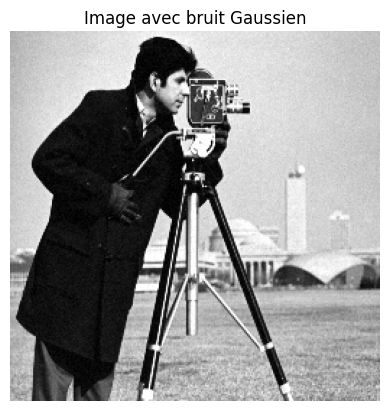

In [24]:
def gauss_Bruit(image, mean=0, var=0.01):
    """
    Fonction pour ajouter un bruit gaussien à une image.
    image: L'image d'entrée.
    mean: La moyenne du bruit (par défaut 0).
    var: La variance du bruit (par défaut 0.01).
    """
    row, col = image.shape
    gauss = np.random.normal(mean, var**0.5, (row, col))  # Générer le bruit gaussien.
    noisy_image = image + gauss  # Ajouter le bruit à l'image.
    noisy_image = np.clip(noisy_image, 0, 255)  # S'assurer que les valeurs restent dans l'intervalle [0, 255].
    return noisy_image

#  Appliquer le bruit gaussien.
noisy_image = gauss_Bruit(img, mean=0, var=25)

#  Afficher l'image bruitée.
plt.imshow(noisy_image, cmap='gray')
plt.title('Image avec bruit Gaussien')
plt.axis('off')  # Désactiver les axes
plt.show()

#  Sauvegarder l'image résultante.
io.imsave('cameraman_noisy.tif', noisy_image.astype(np.uint8))

**Explication :**

- `Ajout du bruit gaussien` :

La fonction `gauss_Bruit()` génère un bruit gaussien (distribution normale) avec les paramètres définis (moyenne = 0 et variance = 25). Le bruit est ajouté à chaque pixel de l'image, puis on s'assure que les valeurs des pixels restent dans la plage acceptable [0, 255] avec la fonction `np.clip()`.

- `Afficher et sauvegarder l'image` :

L'image bruitée est affichée à l'aide de Matplotlib, et ensuite elle est sauvegardée sous le nom 'cameraman_noisy.tif'. La conversion en np.uint8 est nécessaire avant la sauvegarde pour que l'image soit au format standard de 8 bits par pixel.

**Résultat :**

Le bruit gaussien est ajouté avec succès à l'image et l'image bruitée est affichée et sauvegardée pour une utilisation ultérieure.

## les filtres passe-bas (idéal, Butterworth, et gaussien)

###  Filtre passe-bas ideal 0|1

In [25]:
def filtre_passe_bas_ideal(img_b, d0 = 50):
    f_transform = np.fft.fft2(img_b) #
    m,n = f_transform.shape
    H = f_transform.copy()

    for u in range(m):
        for v in range(n):
            d = np.sqrt((u - m // 2)**2 + (v-n//2)**2)

            H[u,v] = 1 if d <= d0 else 0

    img_n = H * f_transform
    img_n = np.abs(np.fft.ifft2(img_n)) #

    return img_n


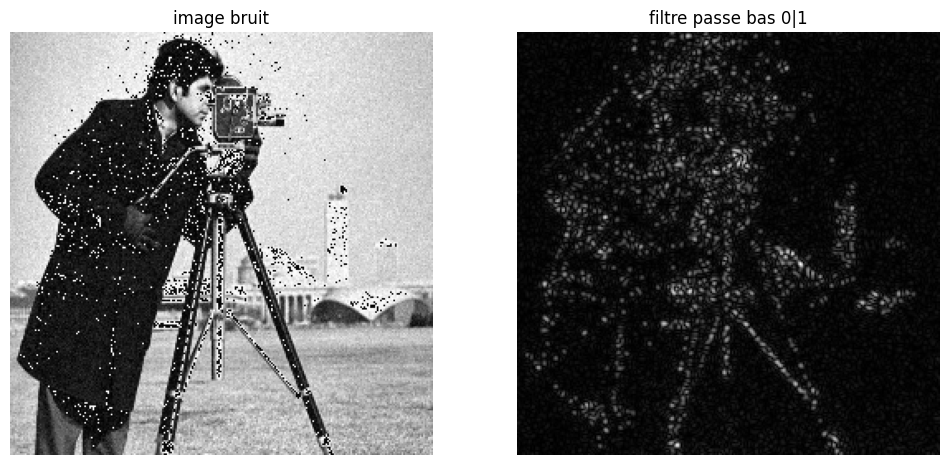

In [26]:
img_n = filtre_passe_bas_ideal(img_b, d0=70)
display_images(img_b, img_n, 'image bruit', 'filtre passe bas 0|1')


### Filtre butterworth

In [27]:
def filtre_butterworth(img_b, d0=5, n=2):
    f_transform = np.fft.fft2(img_b)
    l,c = f_transform.shape
    H = f_transform.copy()

    for u in range(l):
        for v in range(c):
            d = np.sqrt((u - l // 2)**2 + (v-c//2)**2)

            H[u,v] = 1 / (1 + d / d0) ** (2 * n)

    img_n = H * f_transform
    img_n = np.abs(np.fft.ifft2(img_n))

    return img_n.astype(np.uint8)


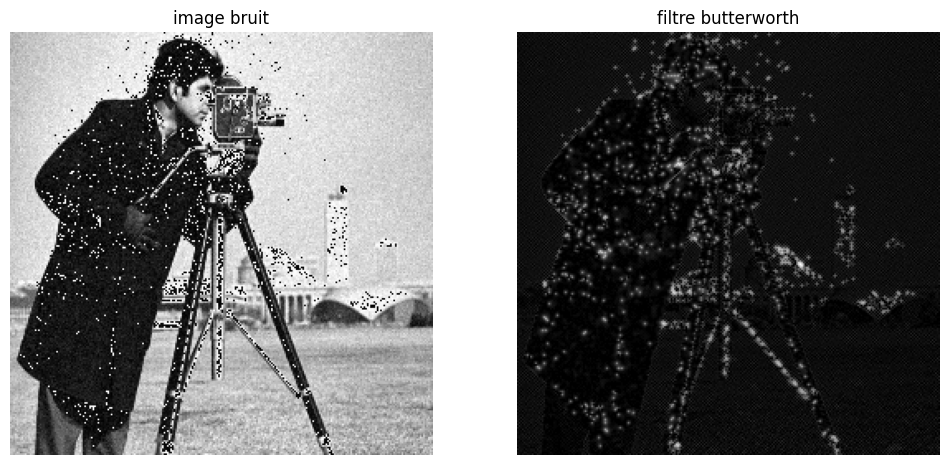

In [28]:
img_n = filtre_butterworth(img_b, d0=100, n=2)
display_images(img_b, img_n, 'image bruit', 'filtre butterworth', (12,8))


### Filtre gaussien

In [29]:
def filtre_gaussien(img_b, d0=5):
    f_transform = np.fft.fft2(img_b)
    l,c = f_transform.shape
    H = f_transform.copy()
    t = d0**2

    for u in range(l):
        for v in range(c):
            d = np.sqrt((u - l // 2)**2 + (v-c//2)**2)

            H[u,v] = np.exp(-(d**2)/(2*t))

    img_n = H * f_transform
    img_n = np.abs(np.fft.ifft2(img_n))

    return img_n.astype(np.uint8)


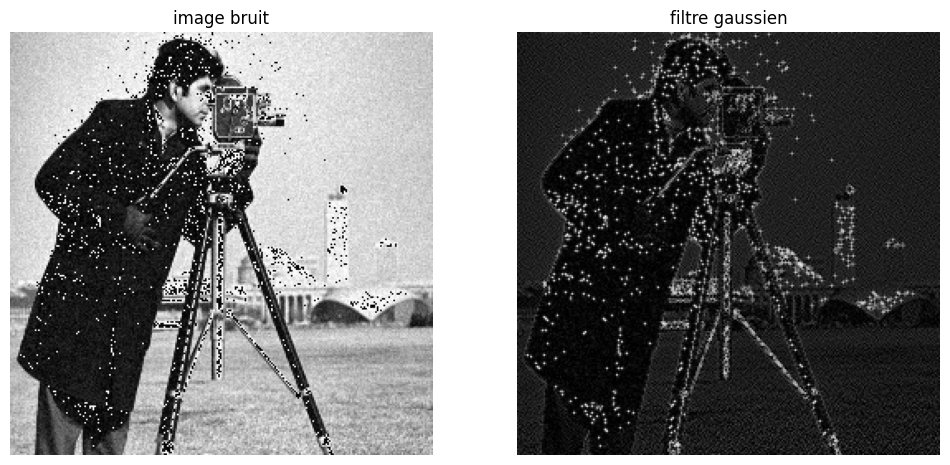

In [30]:
img_n = filtre_gaussien(img_b, d0=80)
display_images(img_b, img_n, 'image bruit', 'filtre gaussien', (12,8))
